In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.shape

(1460, 81)

In [6]:
train_data = train_data.drop(train_data.columns[train_data.apply(lambda col: col.isnull().sum()/len(train_data) > 0.3)], axis=1)

In [7]:
train_data.shape

(1460, 76)

In [8]:
categorical = train_data.dtypes[train_data.dtypes == object].index

print(categorical)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [9]:
numerical2 = train_data.dtypes[train_data.dtypes != object].index
print(numerical2)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [10]:
train_data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

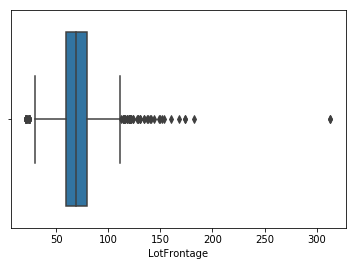

In [11]:
sns.boxplot(x=train_data['LotFrontage'])


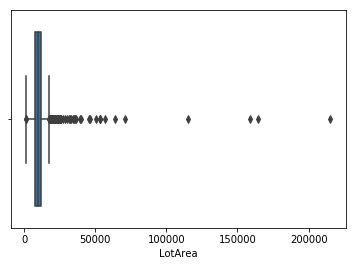

In [12]:
sns.boxplot(x=train_data['LotArea'])

In [13]:
train_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

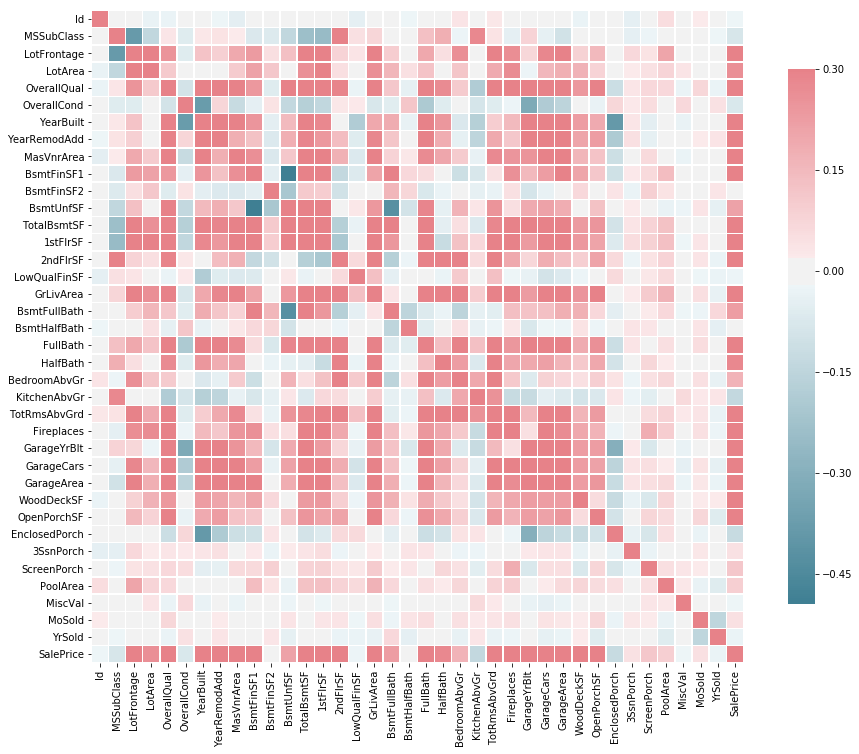

In [14]:
corr = train_data.corr()
plt.figure(figsize = (16,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})


In [15]:
train_data=train_data.drop(['LowQualFinSF','Id','BsmtFinType2','YrSold'],axis=1)

In [16]:
train_data['BsmtQual']=train_data["BsmtQual"].fillna("TA")
train_data['BsmtCond']=train_data["BsmtCond"].fillna("TA")
train_data['GarageType']=train_data["GarageType"].fillna("Attchd")
train_data['GarageFinish']=train_data["GarageFinish"].fillna("Unf")
train_data['GarageQual']=train_data["GarageQual"].fillna("TA")
train_data['GarageCond']=train_data["GarageCond"].fillna("TA")
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())
train_data['MasVnrType']=train_data['MasVnrType'].fillna("None")

In [17]:
train_data1=pd.get_dummies(train_data,columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'])

In [18]:
train_data3=train_data[['MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
     'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice']]

In [19]:
train_data2=train_data[[ 'LotFrontage', 'GarageYrBlt']]

In [20]:
Q1 = train_data2.quantile(0.25)
Q3 = train_data2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LotFrontage    21.0
GarageYrBlt    41.0
dtype: float64


In [21]:
print(IQR.index)
for x in IQR.index:
    print(x,IQR[x])

Index(['LotFrontage', 'GarageYrBlt'], dtype='object')
LotFrontage 21.0
GarageYrBlt 41.0


In [22]:
print('Lower:',Q1 - 1.5 * IQR)
print('Upper:',Q3 + 1.5 * IQR)

Lower: LotFrontage      27.5
GarageYrBlt    1899.5
dtype: float64
Upper: LotFrontage     111.5
GarageYrBlt    2063.5
dtype: float64


In [23]:
train_data_set_Out = train_data2[~((train_data2 < (Q1 - 1.5 * IQR)) |
                                    (train_data2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
train_data_set_Out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1459
Data columns (total 2 columns):
LotFrontage    1113 non-null float64
GarageYrBlt    1299 non-null float64
dtypes: float64(2)
memory usage: 32.2 KB


In [25]:
train_data_set_Out.apply(lambda x: sum(x.isnull()))

LotFrontage    259
GarageYrBlt     73
dtype: int64

In [26]:
train_data_set_Out["LotFrontage"] =train_data_set_Out["LotFrontage"].fillna(train_data_set_Out["LotFrontage"].median())
train_data_set_Out["GarageYrBlt"] =train_data_set_Out["GarageYrBlt"].fillna(train_data_set_Out["GarageYrBlt"].median())

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
frames=[train_data_set_Out,train_data3]
train_new=pd.concat(frames,axis=1,sort=False)

In [28]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 35 columns):
LotFrontage      1372 non-null float64
GarageYrBlt      1372 non-null float64
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64

In [29]:
train_new.apply(lambda x:sum(x.isnull()))

LotFrontage      88
GarageYrBlt      88
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
SalePrice         0
dtype: int64

In [30]:
frames1=[train_new,train_data1]
train_new1=pd.concat(frames,axis=1,sort=False)

In [31]:
train_new1.head()

,LotFrontage,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,65.0,2003.0,60,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,208500
1,80.0,1976.0,20,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,181500
2,68.0,2001.0,60,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,223500
3,60.0,1998.0,70,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,140000
4,84.0,2000.0,60,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,250000


In [32]:
train_new1.apply(lambda x:sum(x.isnull()))

LotFrontage      88
GarageYrBlt      88
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
SalePrice         0
dtype: int64

In [33]:
train_new1["LotFrontage"] =train_new1["LotFrontage"].fillna(train_new1["LotFrontage"].median())
train_new1["GarageYrBlt"] =train_new1["GarageYrBlt"].fillna(train_new1["GarageYrBlt"].median())

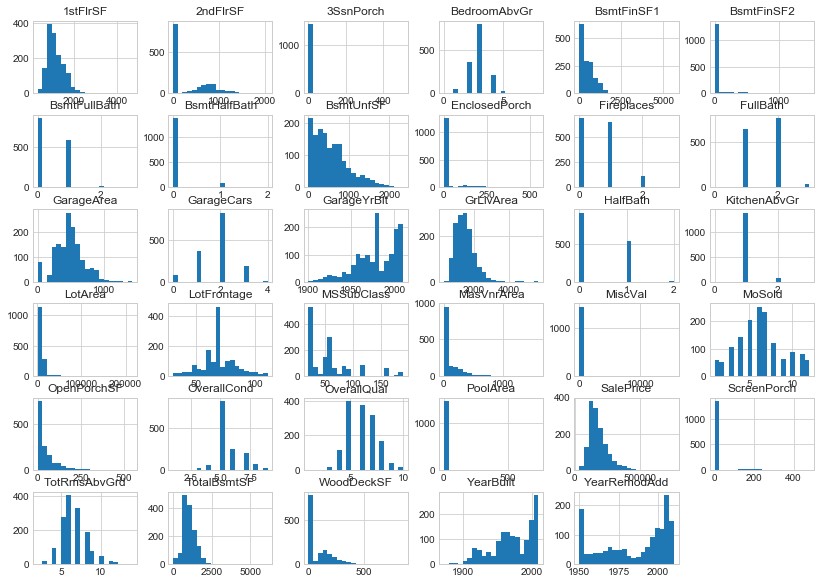

In [34]:
plt.style.use('seaborn-whitegrid')
#plt.style.use('dark_background')
train_new1.hist(bins=20, figsize=(14,10))
plt.show()

In [35]:
X_features=train_new1.drop('SalePrice',axis=1)
Y_target=train_new1['SalePrice']
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test =model_selection.train_test_split(X_features,Y_target,test_size = 0.2,random_state=42)


In [36]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print(regression_model.intercept_)
print(regression_model.coef_)


-1244812.0371097259
[ 1.81218109e+02  2.23607775e+02 -1.65619521e+02  4.09681139e-01
  1.78202238e+04  4.31777914e+03  2.23324719e+02  1.50542241e+02
  2.23109888e+01  9.26471129e+00 -3.53992808e+00 -4.81639211e-02
  5.67661929e+00  1.45042995e+01  1.67569058e+01  2.96073333e+01
  1.14227078e+04 -3.92008535e+02  2.95362620e+03 -2.84400641e+03
 -9.45718657e+03 -1.13443517e+04  4.82412065e+03  4.68625155e+03
  1.26028548e+04 -9.62576497e+00  2.32089607e+01 -5.73054245e+00
  7.77875450e+00  3.12950376e+01  6.39027400e+01 -2.71477735e+01
 -5.59137420e-01 -1.46647473e+02]


In [38]:
my_prediction = regression_model.predict(X_train)
print(my_prediction)

[139689.22146569 185140.23230632  87872.82596057 ... 131083.5297018
 155165.20128671 218995.15830298]


In [39]:
my_prediction_test = regression_model.predict(X_test)
print(my_prediction_test)

[153597.17214065 317265.78662558 108676.14331372 172994.74346243
 300127.27025525  56149.53198986 229456.61536146 148528.13522011
  52223.75850345 146804.9977876  148962.11898297 113582.87612142
  79565.53876952 212019.18077412 188922.71540794 140308.82810505
 210201.15954071 137433.99129345 110787.31598869 232457.45808641
 183190.85688997 212619.43102085 189928.70578829 133493.74087431
 208801.56091083 149295.65363556 198593.50285349  93807.60958063
 188376.43931024 181035.5814801  127517.58524082 274394.33811484
 233572.53787465  88777.05900593 262462.7681804  163054.10953686
 146411.56622626 215078.64180455 299865.22295109  87633.52716845
 130338.03727238 249182.60001279 103803.62088137 276856.43859713
 126370.092572   134099.46180122 102368.41235338 127921.93922296
 365771.20604054 130851.22219804 104187.25883391 214763.87206577
  94459.92154017 324915.17838514 168690.50700285 247069.53154702
 231611.51402987 148305.6047748  159778.21201119 109823.57615332
  52788.73136874 140320.5

In [40]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_train,my_prediction) 

1146160473.0230875

In [41]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_test,my_prediction_test) 

1298646162.6965523

In [42]:
from sklearn.metrics import r2_score
r2_score(Y_train,my_prediction)


0.8078379089712394

In [43]:
from sklearn.metrics import r2_score
r2_score(Y_test,my_prediction_test)

0.8306921860142381

In [44]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1,solver='cholesky')

ridge_reg.fit(X_train,Y_train)
my_prediction_ridge=ridge_reg.predict(X_train)
my_prediction_ridge_test=ridge_reg.predict(X_test)




In [45]:
r2_score(Y_train,my_prediction_ridge)

0.8078370386970853

In [46]:
r2_score(Y_test,my_prediction_ridge_test)

0.830697359443638

In [47]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.2)

lasso_reg.fit(X_train,Y_train)
my_prediction_lasso=lasso_reg.predict(X_train)
my_prediction_lasso_test=lasso_reg.predict(X_test)




C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [48]:
r2_score(Y_train,my_prediction_lasso)

0.8078379080144917

In [49]:
r2_score(Y_test,my_prediction_lasso_test)

0.8306941368168436

In [50]:
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)

en_reg.fit(X_train,Y_train)
my_prediction_en=en_reg.predict(X_train)
my_prediction_en_test=en_reg.predict(X_test)




C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [51]:
r2_score(Y_train,my_prediction_en)

0.806835882965792

In [52]:
r2_score(Y_test,my_prediction_en_test)

0.8310873252261433

In [53]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model = xgb.XGBRegressor()
model.fit(X_train,Y_train)

ModuleNotFoundError: No module named 'xgboost'

ValueError: x and y must have same first dimension, but have shapes (34,) and (1,)

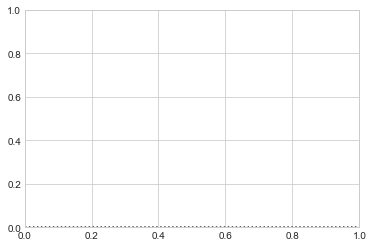

In [54]:
sns.residplot(X_train,Y_train,data=train_new1)  

In [ ]:
from yellowbrick.regressor import ResidualsPlot

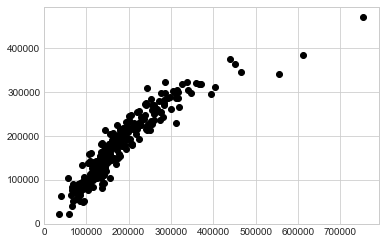

In [55]:
plt.scatter(Y_test, my_prediction_en_test,  color='black')


In [56]:
w=(Y_test- my_prediction_en_test)

In [57]:
residuals=w*w

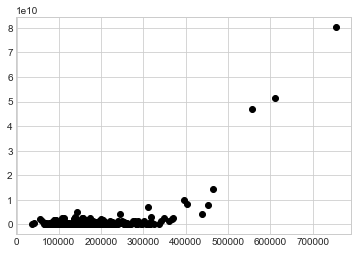

In [58]:
plt.scatter(Y_test, residuals,  color='black')


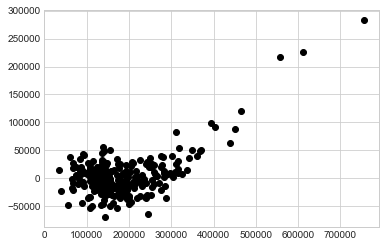

In [59]:
plt.scatter(Y_test, w,  color='black')


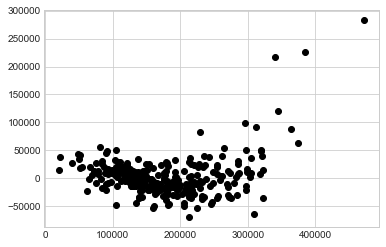

In [60]:
plt.scatter(my_prediction_en_test, w,  color='black')

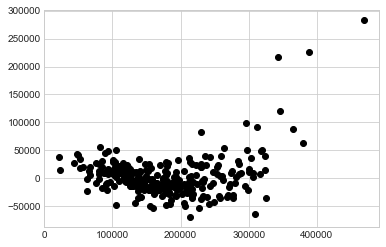

In [61]:
plt.scatter(my_prediction_test, w,  color='black')